Author: Upasana Agrawal

Date: 03/31/2019

Topic: Time Series Analysis

email id: upasana4321@gmail.com

# Time Series Analysis of Greece Super Store Data Set

Ireax Analytix has provided with the dataset of the three-super store . The dataset consists of Date of transaction, time of receipt, value of the receipt, the total number of total customers, and the place of the superstore. The aim of the analysis is to predict the sales for the week, month and for the year and find a best place in Greece to set up a new store based on the current sales and the predicted yearly sales.

# Introduction


Greece is the seventeenth biggest economy in EU-28, representing 1.2 percent of the EU's GDP for 2017, equivalent to Romania and the Czech Republic (Dimosthenis, 2017). After delayed wretchedness, the economy balanced out in 2017, and Greek GDP is assessed to develop around 1.0 percent, and 2.5 percent in 2018. Greece has an industrialist economy with an open area representing around 40 percent of GDP, with the travel industry giving 18 percent of GDP. Greece is a noteworthy recipient of EU help, equivalent to about 3.3 percent of yearly GDP. With a populace of 11 million and a total national output (GDP) of around $204 billion, Greece is a moderately little nation. 

Ierax Analytix is an exploration and market investigation organization. It was made to separate from the standard rates and conclusion surveys and to offer subjective investigation to business people reacting to "why" and not to "what number of". In the meantime, they have created secret shopping, gaining practical experience in chains in the nourishment division. They have entered Venture Garden to connect with individuals who are either in the beginning periods of their business or have officially proceeded onward with their thought and need to share their encounters. 


# Objective
Supermarket organizations have numerous goals. They for the most part layout these destinations in their field-tested strategies a long time before the beginning of new monetary years. These organizations can best achieve their goals by staying client-centered, offering items and administrations their clients need. That is the reason most supermarket organizations likewise create extensive showcasing plans to achieve their key goals. Advertising designs enable the proprietors to more readily characterize their objective clients and store ideas, for example, regardless of whether they serve claim to fame markets like natural sustenance eaters. The objective of the superstore can be as follows:

•	To dependably be the primary selection of clients. 
•	To ensure that clients stay with Primark and ought not to select whatever another store that is a contender of Primark.
•	The business inside the association will dependably be client driven. 
•	The remains the pioneer of the market the whole distance. 
•	To prepare every one of the workers up to universal norms and let them mindful of client relationship the executives. 
•	To prepare the workers for administrative dimensions. 
•	Empower, drive and bolster activities, development, and innovativeness, profiting by chances to help operational objectives     and procedures. 
•	To accomplish worldwide measures from the beginning.
•	Drive and backing ISO guidelines all through the Organization. 
•	Cultivate an open and positive group condition to get and scatter heading, thoughts, and changes to all store levels and         fitting colleagues.


# Project Scope

The scope of the project:
1. Predict future weekly sales
2. Predict monthly sales
3. Predict yearly sales
4. Predict a new location for setting up a new super store
5. Estimate the total number of customers shopping from a new super store


# Importing Libraries

In [1]:
import itertools
import numpy as np
import math as math
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import matplotlib
import collections as collections
import statistics as stats
from matplotlib import figure
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

Reading the Excel Sheet and importing the data

In [2]:
xls = pd.ExcelFile(r'C:\Northeastern\Sem 9\Informatics Capstone\ATHENS RAW DATA 2018_2.xlsx')
df1 = pd.read_excel(xls, 'AB')
df2 = pd.read_excel(xls, 'My Market')
df3 = pd.read_excel(xls, 'Galaxias')

# Exploratory Data Analysis

I am creating function for all individual stores to calculate the total number of customer and their standard deviation for all three super stores: AB, My Market and Galaxias. I would be calling these function later in the project for calculating the present and future values. 

Funtion for calculating the Total No of Customers at AB Super Store

In [3]:
# Calculation of the total no of customers AB
totalNoOfVisitorsAB = 0
totalReceiptValueAB = df1.sum()
totalDataEntriesAB = 0
standardDeviationAB = df1.std()
totalDailyVisitorsAB = []
for index, row in df1.iterrows():
    if((row.TimeOfReceipt == "21:00") or ((row.Date == "2018-12-08") and (row.TimeOfReceipt == "20:00"))):
        totalDailyVisitorsAB.append(row.NumberOfTotalCustomers)
        totalNoOfVisitorsAB = totalNoOfVisitorsAB + row.NumberOfTotalCustomers
totalDataEntriesAB = index
standardDeviationVisitorsAB = stats.stdev(totalDailyVisitorsAB)

Function for calculating the Total No of Customers at My Market Super Store

In [4]:
# Calculation of the total no of customers My Market
totalNoOfVisitorsMM = 0
totalReceiptValueMM = df2.sum()
totalDataEntriesMM = 0
standardDeviationMM = df2.std()
totalDailyVisitorsMM = []
for indexMM, row in df2.iterrows():
    if((row.TimeOfReceipt == "21:00") or ((row.Date == "2018-12-08") and (row.TimeOfReceipt == "20:00"))):
        totalDailyVisitorsMM.append(row.NumberOfTotalCustomers)
        totalNoOfVisitorsMM += row.NumberOfTotalCustomers
totalDataEntriesMM = index
standardDeviationVisitorsMM = stats.stdev(totalDailyVisitorsMM)

Function for calculating the Total No of Customers at Galaxias Super Store

In [5]:
# Calculation of the total no of customers Galaxias
totalNoOfVisitorsGS = 0
totalReceiptValueGS = df3.sum()
totalDataEntriesGS = 0
standardDeviationGS = df3.std()
totalDailyVisitorsGS = []
for indexGS, row in df3.iterrows():
    if((row.TimeOfReceipt == "21:00") or ((row.Date == "2018-12-08") and (row.TimeOfReceipt == "20:00"))):
        totalDailyVisitorsGS.append(row.NumberOfTotalCustomers)
        totalNoOfVisitorsGS += row.NumberOfTotalCustomers
totalDataEntriesGS = index
standardDeviationVisitorsGS = stats.stdev(totalDailyVisitorsGS)

I am creating a function for plotting various types of graphs. I would be plotting Bar Graph, Double Bar Graph, Multi Bar graph and Line Graph for exploratory data analysis and plotting the presnt and future values calculated. 

Function for plotting the Bar Graph

In [6]:
def PlotBarGraph (XValues,YValues,XLabel,YLabel):
    
    position = np.arange(len(XValues))
    plt.figure(figsize=(4,5))
    bar1 = plt.bar(position, YValues, 0.3, align='center', alpha=1.0,color='blue')
    plt.xticks(position, XValues)
    plt.ylabel(YLabel)
    plt.xlabel(XLabel)
    for i in bar1:
        plt.text(i.get_x() + i.get_width()/2, i.get_height() * 1.01, \
                 str(round(i.get_height(), 3)), ha='center', va='bottom',color = 'blue')
    plt.show()
    return;

Function for plotting Double Bar Graph

In [7]:
def PlotDoubleBarGraph (XValues,YValues1,YValues2,XLabel,YLabel,Line1,Line2):
    position = np.arange(len(XValues))
    plt.figure(figsize=(6,5))
    bar1 = plt.bar(position - 0.2, YValues1, 0.4, align='center', alpha=1.0,color='blue')
    bar2 = plt.bar (position + 0.2, YValues2, 0.4, align='center', alpha=1.0,color='red')
    plt.xticks(position, XValues)
    #plt.xticks(rotation=90)
    plt.ylabel(YLabel)
    plt.xlabel(XLabel)
    for i in bar1:
        plt.text(i.get_x() + i.get_width()/2, i.get_height() * 1.01, \
                 str(round(i.get_height(), 3)), ha='center', va='bottom',color = 'blue',rotation=0)
    for i in bar2:
        plt.text(i.get_x() + i.get_width()/2, i.get_height() * 1.01, \
                 str(round(i.get_height(), 3)), ha='center', va='bottom',color = 'red',rotation=0)
    plt.legend([bar1, bar2], [Line1,Line2])
    plt.show()
    return;

Function for plotting Multi Bar Graph

In [8]:
def PlotMultiBarGraph (XValues,YValues1,YValues2,YValues3,YValues4,YValues5,XLabel,YLabel,Line1,Line2,Line3,Line4,Line5):
    position = np.arange(len(XValues))
    plt.figure(figsize=(15,5))
    bar1 = plt.bar (position - 0.3, YValues1, 0.15, align='center', alpha=1.0,color='blue')
    bar2 = plt.bar (position - 0.15, YValues2, 0.15, align='center', alpha=1.0,color='red')
    bar3 = plt.bar (position + 0.0, YValues3, 0.15, align='center', alpha=1.0,color='yellow')
    bar4 = plt.bar (position + 0.15, YValues4, 0.15, align='center', alpha=1.0,color='magenta')
    bar5 = plt.bar (position + 0.3, YValues5, 0.15, align='center', alpha=1.0,color='cyan')
    plt.xticks(position, XValues)
    #plt.xticks(rotation=90)
    plt.ylabel(YLabel)
    plt.xlabel(XLabel)
    for i in bar1:
        plt.text(i.get_x() + i.get_width()/2, i.get_height() * 1.01, \
                 str(round(i.get_height(), 3)), ha='center', va='bottom',color = 'blue',rotation=0)
    for i in bar2:
        plt.text(i.get_x() + i.get_width()/2, i.get_height() * 1.01, \
                 str(round(i.get_height(), 3)), ha='center', va='bottom',color = 'red',rotation=0)
    for i in bar3:
        plt.text(i.get_x() + i.get_width()/2, i.get_height() * 1.01, \
                 str(round(i.get_height(), 3)), ha='center', va='bottom',color = 'black',rotation=0)
    for i in bar4:
        plt.text(i.get_x() + i.get_width()/2, i.get_height() * 1.01, \
                 str(round(i.get_height(), 3)), ha='center', va='bottom',color = 'magenta',rotation=0)
    for i in bar5:
        plt.text(i.get_x() + i.get_width()/2, i.get_height() * 1.01, \
                 str(round(i.get_height(), 3)), ha='center', va='bottom',color = 'black',rotation=0)
    plt.legend([bar1, bar2, bar3, bar4, bar5], [Line1,Line2,Line3,Line4,Line5])
    plt.show()
    return;

Function for plotting Line Graph

In [9]:
def PlotLineGraph (YValues1, YValues2, YValues3, XValues, XLabel, YLabel, Line1, Line2, Line3):
    position = np.arange(len(YValues1))
    plt.figure(figsize=(20,6))
    line1 = plt.plot(position, YValues1, 'r', label = Line1)
    line2 = plt.plot(position, YValues2, 'b', label = Line2)
    line3 = plt.plot(position, YValues3, 'y', label = Line3)
    plt.xticks(position, XValues,rotation = 90)
    plt.xlabel(XLabel)
    plt.ylabel(YLabel)
    plt.legend()
    plt.show()
    return;

Comparison of the total Number of Customers Visting the Super Store

To calculate the current sales, predict the yearly sales and predict a location to set up a new store in Greece, it is essential to calculate the total number of customers visiting the stores and their total sales. At the first step, total number of customers visiting the AB store, Galaxias, and My Market store is calculated. The total number of customers is calculated for the week of which the data is given.

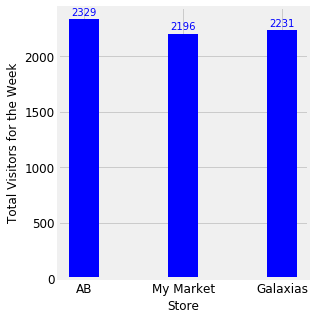

In [10]:
TotalCustomers = (totalNoOfVisitorsAB, totalNoOfVisitorsMM, totalNoOfVisitorsGS)
Stores = ("AB","My Market","Galaxias")
XLabel = 'Store'
YLabel = 'Total Visitors for the Week'
PlotBarGraph(Stores,TotalCustomers,XLabel,YLabel)

Total number of visitors for the week is plotted. It can be seen from the graph that store AB has the highest number of customer’s visiting the store, while the number of customers visiting the My Market store is the lowest as compared. 

## Comparison of the Total Observed Sales for three Super Store

For analyzing the sales for a month and then a year, it is very essential to calculate the sales of the superstore with the given set of data. The sales of the store do not completely depend on the number of customers visiting the store. 

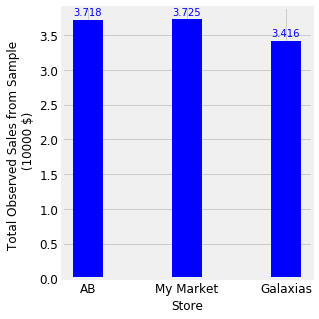

In [11]:
TotalSales = (float(totalReceiptValueAB), float(totalReceiptValueMM), float(totalReceiptValueGS))
YLabel = 'Total Observed Sales from Sample \n (10000 $)'
value = [x/10000 for x in TotalSales]
PlotBarGraph(Stores,value,XLabel,YLabel)

The output above describes the total observed sales from samples. The sales of the My Market store is high, as compared to all the super store. It is essential to calculate the average sales per person.  

Function for calculating the Average Sales of the Super Store

In [12]:
averageSaleAB = float(totalReceiptValueAB.ReceiptValue)/float(totalDataEntriesAB)
averageSaleMM = float(totalReceiptValueMM.ReceiptValue)/float(totalDataEntriesMM)
averageSaleGS = float(totalReceiptValueGS.ReceiptValue)/float(totalDataEntriesGS)

## Comparison of the average sales of the Super Store

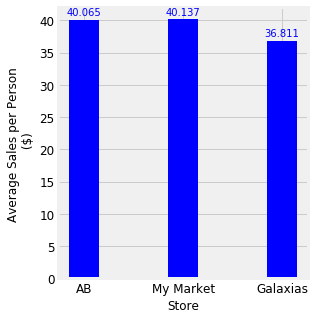

In [13]:
AverageSales = (float(averageSaleAB), float(averageSaleMM), float(averageSaleGS))
YLabel = 'Average Sales per Person \n ($)'
PlotBarGraph(Stores,AverageSales,XLabel,YLabel)

The outut above shows the average sales of the per person. Based on the analysis, it can be said that the average sales per person for the My Market super store is the highest as compared to another store. The average sales per person is calculated to understand the sales of per person. This would help in calculating the prediction of the sales per person for the month and then for the year.  

## Comaprison of the Standard Deviation of the Sample Sales 

The Standard Deviation is a proportion of how spread out numbers is. The main and most important purpose of standard deviation is to understand how spread out a data set is. Standard deviation of the sample sales per visitors is calculated. 

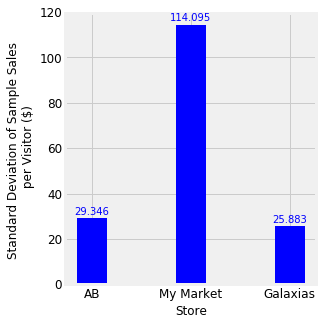

In [14]:
StandardDeviation = (float(standardDeviationAB), float(standardDeviationMM), float(standardDeviationGS))
YLabel = 'Standard Deviation of Sample Sales \n per Visitor ($)'
PlotBarGraph(Stores,StandardDeviation,XLabel,YLabel)

This is calculated to understand the spread of the samples from its mean. Standard deviation gives the upper limit and the lower limit of the values varying from the mean value. From the graph the standard deviation of the My Market Superstore sample is the highest, since the sales of My Market super store is the highest. This is calculated for finding the estimation for the month and for the year.  

Function for calculating Upper Limit and Lower Limit

In [15]:
populationMeanABUpper = averageSaleAB + (1.96 * standardDeviationAB/math.sqrt(totalNoOfVisitorsAB))
populationMeanABLower = averageSaleAB - (1.96 * standardDeviationAB/math.sqrt(totalNoOfVisitorsAB))

populationMeanMMUpper = averageSaleMM + (1.96 * standardDeviationMM/math.sqrt(totalNoOfVisitorsMM))
populationMeanMMLower = averageSaleMM - (1.96 * standardDeviationMM/math.sqrt(totalNoOfVisitorsMM))

populationMeanGSUpper = averageSaleGS + (1.96 * standardDeviationGS/math.sqrt(totalNoOfVisitorsGS))
populationMeanGSLower = averageSaleGS - (1.96 * standardDeviationGS/math.sqrt(totalNoOfVisitorsGS))

PopulationMeanUpper = (float(populationMeanABUpper),float(populationMeanMMUpper),float(populationMeanGSUpper))
PopulationMeanLower = (float(populationMeanABLower),float(populationMeanMMLower),float(populationMeanGSLower))

Comparison of the Upper Limit and Lower Limit of the Population Mean

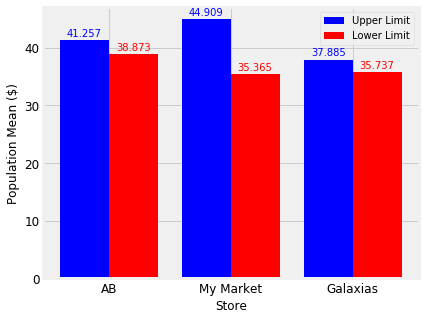

In [16]:
YLabel ='Population Mean ($)'
Line1 = 'Upper Limit'
Line2 = 'Lower Limit'
PlotDoubleBarGraph(Stores,PopulationMeanUpper,PopulationMeanLower,XLabel,YLabel,Line1,Line2)

Calculation of the Upper Limit and Lower Limit of the Estimation of the sales of the Super Stores

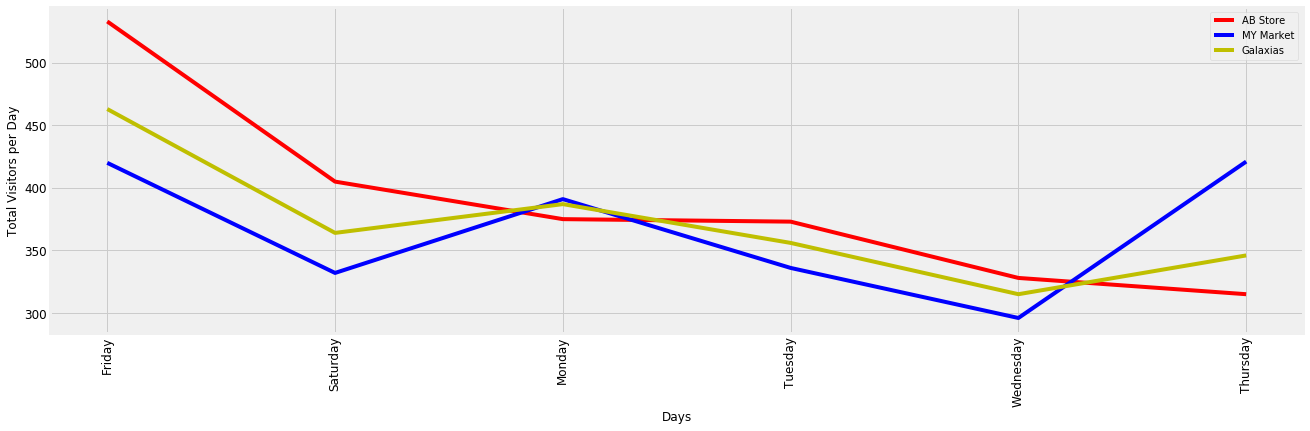

In [17]:
Line1 = 'AB Store'
Line2 = 'MY Market'
Line3 = 'Galaxias'
XLabel = 'Days'
YLabel = 'Total Visitors per Day'
Days = ['Friday','Saturday','Monday','Tuesday','Wednesday','Thursday']
PlotLineGraph(totalDailyVisitorsAB,totalDailyVisitorsMM,totalDailyVisitorsGS,Days,XLabel,YLabel,Line1,Line2,Line3)

The graph does not contain the Sunday data. The reason for not having the Sunday data is that the super stores are closed on Sunday. The total number of visitors visiting the store is highest on Friday. And lowest on Wednesday. The line graph is the best way of representing the total number of visitors visiting per day to analyze the data

Calculation of average visitors per week

In [18]:
averageVisitorsAB = int(totalNoOfVisitorsAB)/6.0
averageVisitorsMM = int(totalNoOfVisitorsMM)/6.0
averageVisitorsGS = int(totalNoOfVisitorsGS)/6.0

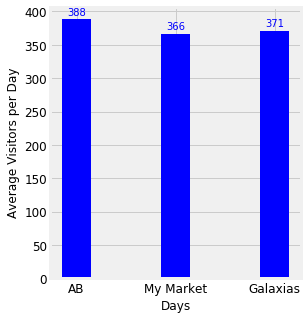

In [19]:
AverageVisitors = (int(averageVisitorsAB), int(averageVisitorsMM), int(averageVisitorsGS))
YLabel = 'Average Visitors per Day'
PlotBarGraph(Stores,AverageVisitors,XLabel,YLabel)

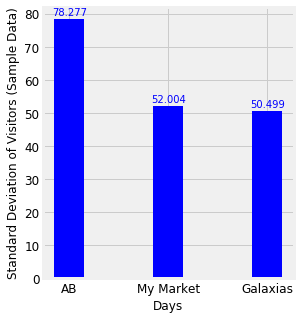

In [20]:
StandardDeviationVisitors = (float(standardDeviationVisitorsAB), \
                             float(standardDeviationVisitorsMM), float(standardDeviationVisitorsGS))
YLabel = 'Standard Deviation of Visitors (Sample Data)'
PlotBarGraph(Stores,StandardDeviationVisitors,XLabel,YLabel)

Calculating Estimated Average Daily Visitors per Month

In [21]:
WorkingDaysInMonth = 26
populationMeanABMonthlyVisitorsUpper = averageVisitorsAB + (1.96 * standardDeviationVisitorsAB/math.sqrt(WorkingDaysInMonth))
populationMeanABMonthlyVisitorsLower = averageVisitorsAB - (1.96 * standardDeviationVisitorsAB/math.sqrt(WorkingDaysInMonth))

populationMeanMMMonthlyVisitorsUpper = averageVisitorsMM + (1.96 * standardDeviationVisitorsMM/math.sqrt(WorkingDaysInMonth))
populationMeanMMMonthlyVisitorsLower = averageVisitorsMM - (1.96 * standardDeviationVisitorsMM/math.sqrt(WorkingDaysInMonth))

populationMeanGSMonthlyVisitorsUpper = averageVisitorsGS + (1.96 * standardDeviationVisitorsGS/math.sqrt(WorkingDaysInMonth))
populationMeanGSMonthlyVisitorsLower = averageVisitorsGS - (1.96 * standardDeviationVisitorsGS/math.sqrt(WorkingDaysInMonth))

PopulationMeanMonthlyVisitorsUpper = (int(populationMeanABMonthlyVisitorsUpper),\
                               int(populationMeanMMMonthlyVisitorsUpper),int(populationMeanGSMonthlyVisitorsUpper))
PopulationMeanMonthlyVisitorsLower = (int(populationMeanABMonthlyVisitorsLower),\
                               int(populationMeanMMMonthlyVisitorsLower),int(populationMeanGSMonthlyVisitorsLower))

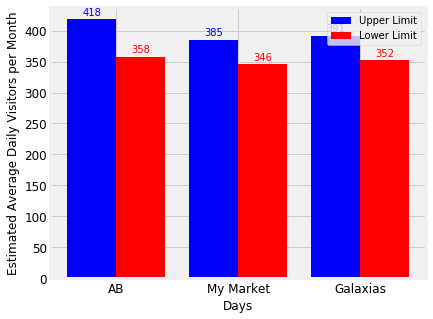

In [22]:
YLabel = 'Estimated Average Daily Visitors per Month'
Line1 = 'Upper Limit'
Line2 = 'Lower Limit'
PlotDoubleBarGraph(Stores,PopulationMeanMonthlyVisitorsUpper,PopulationMeanMonthlyVisitorsLower,XLabel,YLabel,Line1,Line2)

Calculating Upper Limit and Lower Limit for  Estimating Monthly Visitors

In [23]:
TotalMonthlyVisitorsABUpper = populationMeanABMonthlyVisitorsUpper * WorkingDaysInMonth
TotalMonthlyVisitorsABLower = populationMeanABMonthlyVisitorsLower * WorkingDaysInMonth

TotalMonthlyVisitorsMMUpper = populationMeanMMMonthlyVisitorsUpper * WorkingDaysInMonth
TotalMonthlyVisitorsMMLower = populationMeanMMMonthlyVisitorsLower * WorkingDaysInMonth

TotalMonthlyVisitorsGSUpper = populationMeanGSMonthlyVisitorsUpper * WorkingDaysInMonth
TotalMonthlyVisitorsGSLower = populationMeanGSMonthlyVisitorsLower * WorkingDaysInMonth

TotalMonthlyVisitorsUpper = (int(TotalMonthlyVisitorsABUpper),\
                             int(TotalMonthlyVisitorsMMUpper),int(TotalMonthlyVisitorsGSUpper))
TotalMonthlyVisitorsLower = (int(TotalMonthlyVisitorsABLower),\
                             int(TotalMonthlyVisitorsMMLower),int(TotalMonthlyVisitorsGSLower))

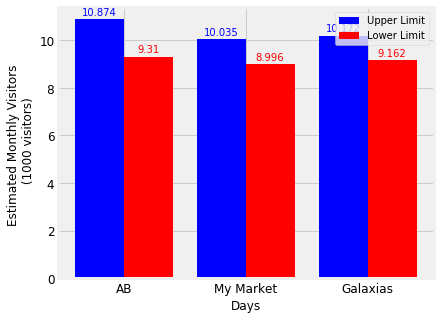

In [24]:
YLabel = 'Estimated Monthly Visitors \n (1000 visitors)'
Line1 = 'Upper Limit'
Line2 = 'Lower Limit'
value1 = [x/1000 for x in TotalMonthlyVisitorsUpper]
value2 = [x/1000 for x in TotalMonthlyVisitorsLower]
PlotDoubleBarGraph(Stores,value1,value2,XLabel,YLabel,Line1,Line2)

The mean may not be a reasonable portrayal of the information, claiming the normal is effectively impacted by exceptions. The mean is another approach to quantify the focal point of a numerical informational collection. The average value of the visitors visiting per week would give the average value of the visiting the super store. 

Calculating Upper Limit and Lower Limit for Estimating Yearly Vistors

For calculating the prediction, it is essential to calculate the maximum possibility (Upper Limit) and minimum possibility (Lower Limit). The calculation is done to have the estimation of the profit as well as the loss. 

In [25]:
WorkingDaysInYear = 316
populationMeanABYearlyVisitorsUpper = averageVisitorsAB + (1.96 * standardDeviationVisitorsAB/math.sqrt(WorkingDaysInYear))
populationMeanABYearlyVisitorsLower = averageVisitorsAB - (1.96 * standardDeviationVisitorsAB/math.sqrt(WorkingDaysInYear))

populationMeanMMYearlyVisitorsUpper = averageVisitorsMM + (1.96 * standardDeviationVisitorsMM/math.sqrt(WorkingDaysInYear))
populationMeanMMYearlyVisitorsLower = averageVisitorsMM - (1.96 * standardDeviationVisitorsMM/math.sqrt(WorkingDaysInYear))

populationMeanGSYearlyVisitorsUpper = averageVisitorsGS + (1.96 * standardDeviationVisitorsGS/math.sqrt(WorkingDaysInYear))
populationMeanGSYearlyVisitorsLower = averageVisitorsGS - (1.96 * standardDeviationVisitorsGS/math.sqrt(WorkingDaysInYear))

PopulationMeanYearlyVisitorsUpper = (int(populationMeanABYearlyVisitorsUpper),\
                               int(populationMeanMMYearlyVisitorsUpper),int(populationMeanGSYearlyVisitorsUpper))
PopulationMeanYearlyVisitorsLower = (int(populationMeanABYearlyVisitorsLower),\
                               int(populationMeanMMYearlyVisitorsLower),int(populationMeanGSYearlyVisitorsLower))

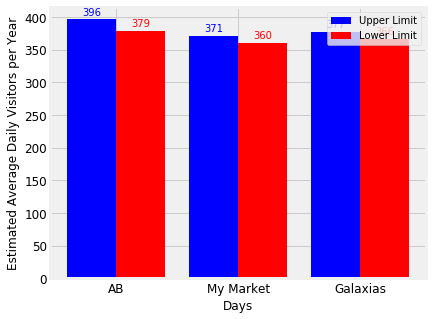

In [26]:
YLabel = 'Estimated Average Daily Visitors per Year'
Line1 = 'Upper Limit'
Line2 = 'Lower Limit'
PlotDoubleBarGraph(Stores,PopulationMeanYearlyVisitorsUpper,PopulationMeanYearlyVisitorsLower,XLabel,YLabel,Line1,Line2)

The average daily visitors per month graph gives the upper limit and lower limit of the estimated average daily visitors per month. Comparison analysis is done for all the three stores. It can be predicted that on an average the maximum of 418 customers would be visiting the AB store and the minimum 358 customers visiting the store with 95% confidence interval. 

In [27]:
TotalYearlyVisitorsABUpper = populationMeanABYearlyVisitorsUpper * WorkingDaysInYear
TotalYearlyVisitorsABLower = populationMeanABYearlyVisitorsLower * WorkingDaysInYear

TotalYearlyVisitorsMMUpper = populationMeanMMYearlyVisitorsUpper * WorkingDaysInYear
TotalYearlyVisitorsMMLower = populationMeanMMYearlyVisitorsLower * WorkingDaysInYear

TotalYearlyVisitorsGSUpper = populationMeanGSYearlyVisitorsUpper * WorkingDaysInYear
TotalYearlyVisitorsGSLower = populationMeanGSYearlyVisitorsLower * WorkingDaysInYear

TotalYearlyVisitorsUpper = (int(TotalYearlyVisitorsABUpper),\
                             int(TotalYearlyVisitorsMMUpper),int(TotalYearlyVisitorsGSUpper))
TotalYearlyVisitorsLower = (int(TotalYearlyVisitorsABLower),\
                             int(TotalYearlyVisitorsMMLower),int(TotalYearlyVisitorsGSLower))

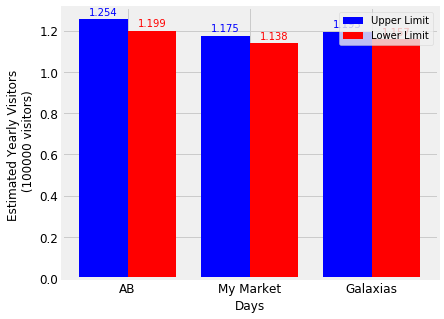

In [28]:
YLabel = 'Estimated Yearly Visitors \n (100000 visitors)'
Line1 = 'Upper Limit'
Line2 = 'Lower Limit'
value1 = [x/100000 for x in TotalYearlyVisitorsUpper]
value2 = [x/100000 for x in TotalYearlyVisitorsLower]
PlotDoubleBarGraph(Stores,value1,value2,XLabel,YLabel,Line1,Line2)

Figure above describes the estimated yearly visitors. Maximum of 125387 customers would be visiting the store and minimum of 119933 visitors would be visiting the AB store and similarly the comparison of the two stores is given.  

Calculation of the Sales Regionally to predict a location for setting up a new store

In [29]:
ABStore = df1.groupby(['Residence'])['ReceiptValue'].sum()
MMStore = df2.groupby(['Residence'])['ReceiptValue'].sum()
GSStore = df3.groupby(['Residence'])['ReceiptValue'].sum()
keysAB = ABStore.keys()
keysMM = MMStore.keys()
keysGS = GSStore.keys()
a = set()
for ind in range (0,keysAB.size):
    a.add(keysAB[ind])
for ind in range (0,keysMM.size):
    a.add(keysMM[ind])
for ind in range (0,keysGS.size):
    a.add(keysGS[ind])

for i in a:
    if (i not in ABStore):
        ABStore[i]=0
    if (i not in MMStore):
        MMStore[i]=0
    if (i not in GSStore):
        GSStore[i]=0

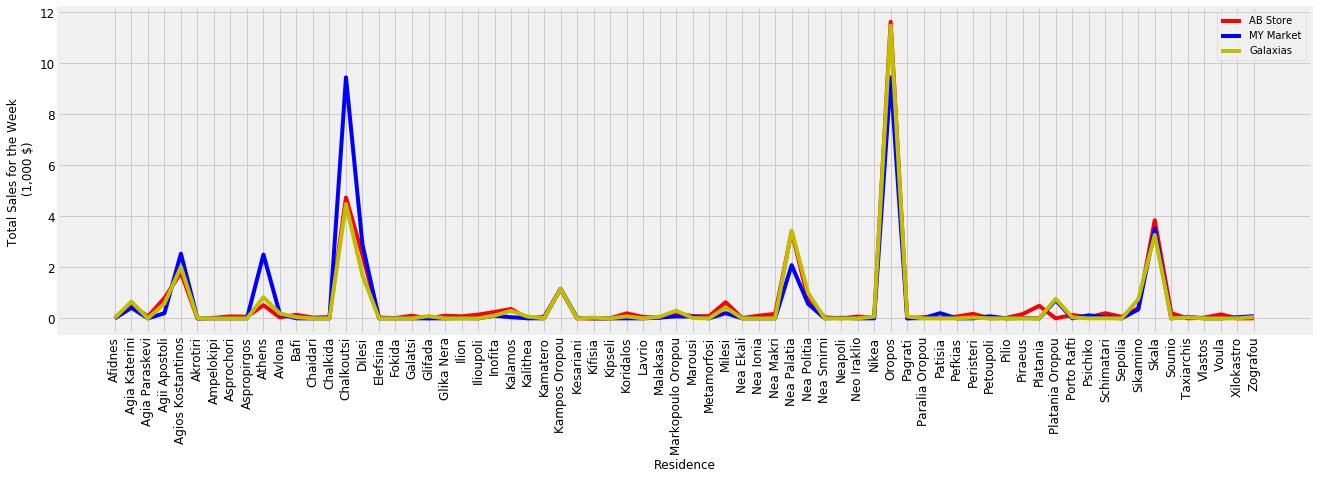

In [30]:
ABStoreSorted = sorted(ABStore.items())
x1,y1 = zip(*ABStoreSorted)
MMStoreSorted = sorted(MMStore.items())
x2,y2 = zip(*MMStoreSorted)
GSStoreSorted = sorted(GSStore.items())
x3,y3 = zip(*GSStoreSorted)
pos_index = set()
for i,v in ABStoreSorted:
    pos_index.add(i)
posIndexSorted = sorted(pos_index)
Line1 = 'AB Store'
Line2 = 'MY Market'
Line3 = 'Galaxias'
XLabel = 'Residence'
YLabel = 'Total Sales for the Week \n (1,000 $)'
value1 = [x/1000 for x in y1]
value2 = [x/1000 for x in y2]
value3 = [x/1000 for x in y3]
PlotLineGraph(value1,value2,value3,posIndexSorted,XLabel,YLabel,Line1,Line2,Line3)

For opening a new store at any place, it is essential to analyze the sales of the super stores that are based in every location. It can be seen from the above figure that the sales for all three stores is high in Chalkoutsi and the highest in Oropus. This prediction is done based on the sales of the three super stores for the week. It can be said the sales of the superstore is based on the number of customers buying the product. Higher the population, higher the customers visiting the store and higher the sales. It is not always necessary that the sales of the store are equivalent to the number of customers visiting, but the probability is high that the highest the population in the area, highest would be the sales. So, a new super store can be set up at Chalkoutsi and Oropus, but the best location is Oropus.  

In [31]:
EstimatedMonthlyIncomeAB1 = populationMeanABUpper*TotalMonthlyVisitorsABUpper
EstimatedMonthlyIncomeAB2 = populationMeanABUpper*TotalMonthlyVisitorsABLower
EstimatedMonthlyIncomeAB3 = populationMeanABLower*TotalMonthlyVisitorsABUpper
EstimatedMonthlyIncomeAB4 = populationMeanABLower*TotalMonthlyVisitorsABLower

EstimatedMonthlyIncomeMM1 = populationMeanMMUpper*TotalMonthlyVisitorsMMUpper
EstimatedMonthlyIncomeMM2 = populationMeanMMUpper*TotalMonthlyVisitorsMMLower
EstimatedMonthlyIncomeMM3 = populationMeanMMLower*TotalMonthlyVisitorsMMUpper
EstimatedMonthlyIncomeMM4 = populationMeanMMLower*TotalMonthlyVisitorsMMLower

EstimatedMonthlyIncomeGS1 = populationMeanGSUpper*TotalMonthlyVisitorsGSUpper
EstimatedMonthlyIncomeGS2 = populationMeanGSUpper*TotalMonthlyVisitorsGSLower
EstimatedMonthlyIncomeGS3 = populationMeanGSLower*TotalMonthlyVisitorsGSUpper
EstimatedMonthlyIncomeGS4 = populationMeanGSLower*TotalMonthlyVisitorsGSLower

UpperVisitorsUpperIncome = (int(EstimatedMonthlyIncomeAB1),int(EstimatedMonthlyIncomeMM1),int(EstimatedMonthlyIncomeGS1))
UpperVisitorsLowerIncome = (int(EstimatedMonthlyIncomeAB2),int(EstimatedMonthlyIncomeMM2),int(EstimatedMonthlyIncomeGS2))
LowerVisitorsUpperIncome = (int(EstimatedMonthlyIncomeAB3),int(EstimatedMonthlyIncomeMM3),int(EstimatedMonthlyIncomeGS3))
LowerVisitorsLowerIncome = (int(EstimatedMonthlyIncomeAB4),int(EstimatedMonthlyIncomeMM4),int(EstimatedMonthlyIncomeGS4))
AverageEstimatedMonthly = (int((int(EstimatedMonthlyIncomeAB1)+int(EstimatedMonthlyIncomeAB2)+int(EstimatedMonthlyIncomeAB3)+\
                            int(EstimatedMonthlyIncomeAB4))/4),
                           (int((int(EstimatedMonthlyIncomeMM1)+int(EstimatedMonthlyIncomeMM2)+int(EstimatedMonthlyIncomeMM3)+\
                            int(EstimatedMonthlyIncomeMM4))/4)),
                           (int((int(EstimatedMonthlyIncomeGS1)+int(EstimatedMonthlyIncomeGS2)+int(EstimatedMonthlyIncomeGS3)+\
                            int(EstimatedMonthlyIncomeGS4))/4)))

Calculation of the Estimation of Montly Store Sales with the maximum and minimum possibility

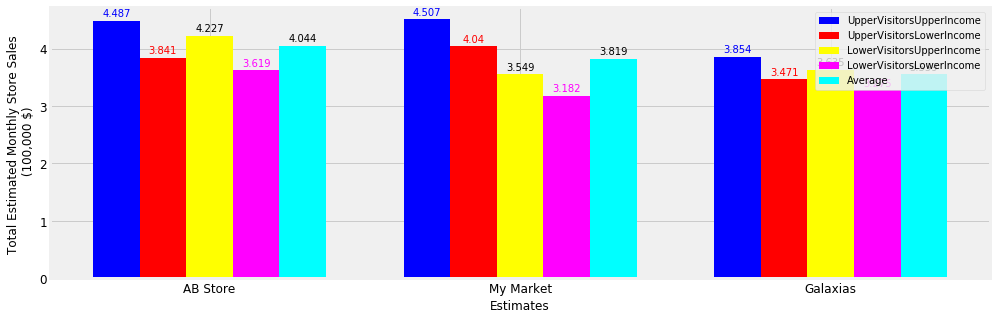

In [32]:
YLabel = 'Total Estimated Monthly Store Sales \n (100,000 $)'
Line1 = 'UpperVisitorsUpperIncome'
Line2 = 'UpperVisitorsLowerIncome'
Line3 = 'LowerVisitorsUpperIncome'
Line4 = 'LowerVisitorsLowerIncome'
Line5 = 'Average'
XLabel = 'Estimates'
Plots = ('AB Store','My Market','Galaxias')
value1 = [x/100000 for x in UpperVisitorsUpperIncome]
value2 = [x/100000 for x in UpperVisitorsLowerIncome]
value3 = [x/100000 for x in LowerVisitorsUpperIncome]
value4 = [x/100000 for x in LowerVisitorsLowerIncome]
value5 = [x/100000 for x in AverageEstimatedMonthly]
PlotMultiBarGraph(Plots,value1,value2,value3,value4,value5,\
                   XLabel,YLabel,Line1,Line2,Line3,Line4,Line5)

The above describes the monthly sales estimation and the figure below would describe yearly sales estimation respectively. The figure describes the value if the maximum number of visitors visiting the store to the highest sales, maximum number of visitors visiting the store to the lowest sales, Lower number of visitors visiting the store to the highest sales, lower number of visitors visiting the store to the lowest sales and the average of all. 

Calculation of the Estimation of Yearly Store Sales with the maximum and minimum possibility

In [33]:
EstimatedYearlyIncomeAB1 = populationMeanABUpper*TotalYearlyVisitorsABUpper
EstimatedYearlyIncomeAB2 = populationMeanABUpper*TotalYearlyVisitorsABLower
EstimatedYearlyIncomeAB3 = populationMeanABLower*TotalYearlyVisitorsABUpper
EstimatedYearlyIncomeAB4 = populationMeanABLower*TotalYearlyVisitorsABLower

EstimatedYearlyIncomeMM1 = populationMeanMMUpper*TotalYearlyVisitorsMMUpper
EstimatedYearlyIncomeMM2 = populationMeanMMUpper*TotalYearlyVisitorsMMLower
EstimatedYearlyIncomeMM3 = populationMeanMMLower*TotalYearlyVisitorsMMUpper
EstimatedYearlyIncomeMM4 = populationMeanMMLower*TotalYearlyVisitorsMMLower

EstimatedYearlyIncomeGS1 = populationMeanGSUpper*TotalYearlyVisitorsGSUpper
EstimatedYearlyIncomeGS2 = populationMeanGSUpper*TotalYearlyVisitorsGSLower
EstimatedYearlyIncomeGS3 = populationMeanGSLower*TotalYearlyVisitorsGSUpper
EstimatedYearlyIncomeGS4 = populationMeanGSLower*TotalYearlyVisitorsGSLower

UpperVisitorsUpperIncomeYearly = (int(EstimatedYearlyIncomeAB1),int(EstimatedYearlyIncomeMM1),int(EstimatedYearlyIncomeGS1))
UpperVisitorsLowerIncomeYearly = (int(EstimatedYearlyIncomeAB2),int(EstimatedYearlyIncomeMM2),int(EstimatedYearlyIncomeGS2))
LowerVisitorsUpperIncomeYearly = (int(EstimatedYearlyIncomeAB3),int(EstimatedYearlyIncomeMM3),int(EstimatedYearlyIncomeGS3))
LowerVisitorsLowerIncomeYearly = (int(EstimatedYearlyIncomeAB4),int(EstimatedYearlyIncomeMM4),int(EstimatedYearlyIncomeGS4))
AverageEstimatedYearly = (int((int(EstimatedYearlyIncomeAB1)+int(EstimatedYearlyIncomeAB2)+int(EstimatedYearlyIncomeAB3)+\
                            int(EstimatedYearlyIncomeAB4))/4),
                           (int((int(EstimatedYearlyIncomeMM1)+int(EstimatedYearlyIncomeMM2)+int(EstimatedYearlyIncomeMM3)+\
                            int(EstimatedYearlyIncomeMM4))/4)),
                           (int((int(EstimatedYearlyIncomeGS1)+int(EstimatedYearlyIncomeGS2)+int(EstimatedYearlyIncomeGS3)+\
                            int(EstimatedYearlyIncomeGS4))/4)))

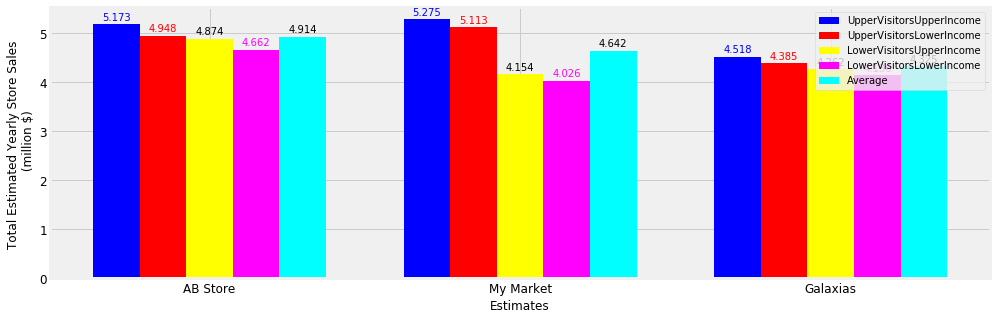

In [34]:
YLabel = 'Total Estimated Yearly Store Sales \n (million $)'
Line1 = 'UpperVisitorsUpperIncome'
Line2 = 'UpperVisitorsLowerIncome'
Line3 = 'LowerVisitorsUpperIncome'
Line4 = 'LowerVisitorsLowerIncome'
Line5 = 'Average'
XLabel = 'Estimates'
Plots = ('AB Store','My Market','Galaxias')
value1 = [x/1000000 for x in UpperVisitorsUpperIncomeYearly]
value2 = [x/1000000 for x in UpperVisitorsLowerIncomeYearly]
value3 = [x/1000000 for x in LowerVisitorsUpperIncomeYearly]
value4 = [x/1000000 for x in LowerVisitorsLowerIncomeYearly]
value5 = [x/1000000 for x in AverageEstimatedYearly]
PlotMultiBarGraph(Plots,value1,value2,value3,value4,value5,\
                   XLabel,YLabel,Line1,Line2,Line3,Line4,Line5)

The data analysis could be done more accurately if the data set for a month would be given and for more stores. This would help in analyzing more accurately to predict the location for setting up a new store. Also, the data analysis can be done using machine learning algorithms. In this project machine learning algorithms are not used, as the sponsors don’t need a prediction model. Machine learning algorithms would give more accurate results as different measuring parameter matrix can be used for the measurement of the results obtained. 

# Conclusion

From the analysis it can be inferred that with the given dataset for just six days, it is little difficult to calculate the annual sales and predict the location for setting up a new store in Greece. The accuracy of the estimation would not be 100%. The calculation of the monthly estimation and yearly estimation is done by taking 95% confidence interval. From the observation it can be inferred that the total number of customers visiting the AB store would be high while the sales of the My Market super store would be high. By comparing all the results, it can be said that Chalkoutsi and Oropus is the best place to set up a new store. But of the two Oropus is the best place to set up a new super store. 